## Importation des librairies et des jeux de données nécessaires à notre travail

In [2]:
import sys
sys.path.insert(0, "/home/apprenant/Documents/Brief-Emotion-Analysis-Text/")

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from src.functions import plot_roc

# vecteur_emotion_final = pd.read_csv('/home/apprenant/Documents/Brief-Emotion-Analysis-Text/data/03_vectorized/emotion_final_matrix.csv')
emotion_final = pd.read_csv('/home/apprenant/Documents/Brief-Emotion-Analysis-Text/data/02_cleaned/cleaned_emotion_final.csv')

# vecteur_text_emotion = pd.read_csv('/home/apprenant/Documents/Brief-Emotion-Analysis-Text/data/03_vectorized/text_emotion_matrix.csv')
text_emotion = pd.read_csv('/home/apprenant/Documents/Brief-Emotion-Analysis-Text/data/02_cleaned/cleaned_text_emotion.csv')

In [3]:
emotion_final.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
emotion_final.shape

(21456, 2)

In [5]:
text_emotion.shape

(40000, 3)

## Etape 1 : Comparaison de classification du premier jeu de données avec la classification du second jeu de données

### Premier jeu de données

#### Label-encoding des émotions

In [6]:
emotion_final['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [7]:
conditions = [(emotion_final['label'] == "sadness") | (emotion_final['label'] == "fear") | (emotion_final['label'] == "anger"), (emotion_final['label'] == "love") | (emotion_final['label'] == "surprise") | (emotion_final['label'] == "happy")] 

In [8]:
values = [0, 1]

In [9]:
emotion_final['binary_emotion'] = np.select(conditions, values)

In [10]:
emotion_final.head(15)

,text,label,binary_emotion
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,0
5,ive been feeling a little burdened lately wasn...,sadness,0
6,ive been taking or milligrams or times recomme...,surprise,1
7,i feel as confused about life as a teenager or...,fear,0
8,i have been with petronas for years i feel tha...,happy,1
9,i feel romantic too,love,1


#### Choix des variables

In [11]:
X = emotion_final['text']
y = emotion_final['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Mise en place du modèle

In [12]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(emotion_final['text'])

CountVectorizer(lowercase=False, min_df=0)

In [13]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [14]:
classifier = LogisticRegression()
classifier.fit(text_train, y_train)
score = classifier.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.9527


In [15]:
y_pred = classifier.predict(text_test)

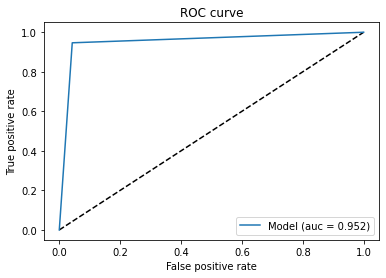

In [16]:
plot_roc(y_test, y_pred)

### Second jeu de données

#### Label encoding des émotions

In [17]:
text_emotion['label'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [18]:
conditions = [(text_emotion['label'] == "empty") | (text_emotion['label'] == "sadness") | (text_emotion['label'] == "worry") | (text_emotion['label'] == "hate") | (text_emotion['label'] == "boredom") | (text_emotion['label'] == "anger"), (text_emotion['label'] == "enthusiasm") | (text_emotion['label'] == "neutral") | (text_emotion['label'] == "surprise") | (text_emotion['label'] == "love") | (text_emotion['label'] == "fun") | (text_emotion['label'] == "happiness") | (text_emotion['label'] == "relief")] 

In [19]:
values = [0, 1]

In [20]:
text_emotion['binary_emotion'] = np.select(conditions, values)

In [21]:
text_emotion

,tweet_id,label,text,binary_emotion
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,0
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,0
3,1956967789,enthusiasm,wants to hang out with friends SOON!,1
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,1
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,1
39996,1753919001,love,Happy Mothers Day All my love,1
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,1
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,1


#### Choix des variables

In [22]:
X = text_emotion['text']
y = text_emotion['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Mise en place du modèle

In [23]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(text_emotion['text'])

CountVectorizer(lowercase=False, min_df=0)

In [24]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [25]:
classifier = LogisticRegression()
classifier.fit(text_train, y_train)
score = classifier.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.719


In [26]:
y_pred = classifier.predict(text_test)

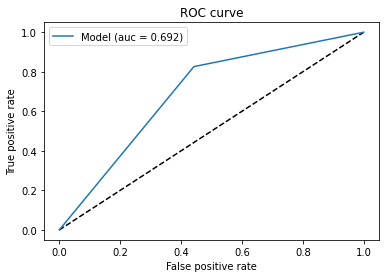

In [27]:
plot_roc(y_test, y_pred)

Les résultats obtenus dans les deux jeux de données sont différents. 
Dans un premier temps, nous avons réalisé deux modèles différents. Ensuite, la différence notable entre ces deux jeux de données est la nature du texte implanté dans ces jeux de données. Dans le premier jeu, notre texte présente un langage plus soutenu alors que le second se compose de tweets donc présentant un langage plus courant. L'accuracy peut donc être expliqué par le niveau de langue.
On peut également supposer que le nombre d'émotions de chacun des deux jeux de données influence le résultat.

## Etape 2 : Combiner les deux jeux de données pour améliorer les résultats de prédiction

In [28]:
emotion_final_extracted = emotion_final[['text', 'label']]
text_emotion_extracted = text_emotion[['text', 'label']]
new_emotion_text = pd.concat([emotion_final_extracted, text_emotion_extracted])

In [29]:
new_emotion_text.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [30]:
new_emotion_text.shape

(61456, 2)

### Label encoding des données

In [31]:
new_emotion_text['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy', 'empty',
       'enthusiasm', 'neutral', 'worry', 'fun', 'hate', 'happiness',
       'boredom', 'relief'], dtype=object)

In [32]:
new_emotion_text["label"].replace({'happiness': 'happy'}, inplace=True)

In [33]:
new_emotion_text['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy', 'empty',
       'enthusiasm', 'neutral', 'worry', 'fun', 'hate', 'boredom',
       'relief'], dtype=object)

In [34]:
conditions = [(new_emotion_text['label'] == "empty") | (new_emotion_text['label'] == "sadness") | (new_emotion_text['label'] == "worry") | (new_emotion_text['label'] == "hate") | (new_emotion_text['label'] == "boredom") | (new_emotion_text['label'] == "anger") | new_emotion_text['label'] == "fear", (new_emotion_text['label'] == "enthusiasm") | (new_emotion_text['label'] == "neutral") | (new_emotion_text['label'] == "surprise") | (new_emotion_text['label'] == "love") | (new_emotion_text['label'] == "fun") | (new_emotion_text['label'] == "happy") | (new_emotion_text['label'] == "relief")] 

In [35]:
values = [0, 1]

In [36]:
new_emotion_text['binary_emotion'] = np.select(conditions, values)

In [37]:
new_emotion_text

,text,label,binary_emotion
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,0
...,...,...,...
39995,@JohnLloydTaylor,neutral,1
39996,Happy Mothers Day All my love,love,1
39997,Happy Mother's Day to all the mommies out ther...,love,1
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happy,1


### Choix des variables

In [38]:
X = new_emotion_text['text']
y = new_emotion_text['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Mise en place du modèle

In [39]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(new_emotion_text['text'])

CountVectorizer(lowercase=False, min_df=0)

In [40]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [41]:
classifier = LogisticRegression()
classifier.fit(text_train, y_train)
score = classifier.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.7874


In [42]:
y_pred = classifier.predict(text_test)

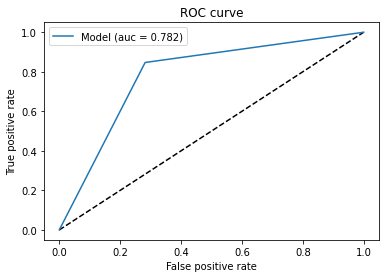

In [43]:
plot_roc(y_test, y_pred)

Pour cette deuxième étape, nous avons récupéré les deux jeux de données pour les combiner en un seul. L'accuracy se trouve entre les deux jeux de données, ce qui paraît normal.

## Etape 3 : Utiliser les nouvelles émotions du jeu de données 2 et les prédire sur les messages du jeu 1

### Choix des variables

In [44]:
X = text_emotion['text']
y = text_emotion['binary_emotion']
X_test = emotion_final['text']
y_test = emotion_final['binary_emotion']

In [45]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)
vectorizer.fit(X_test)

CountVectorizer(lowercase=False, min_df=0)

In [46]:
text_train = vectorizer.transform(X)
text_test = vectorizer.transform(X_test)

In [47]:
classifier = LogisticRegression()
classifier.fit(text_train, y)

LogisticRegression()

In [48]:
y_pred = classifier.predict(text_test)

In [53]:
pd.DataFrame({'text':X_test, 'predictions':y_pred})

,text,predictions
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,0
4,i am feeling grouchy,0
...,...,...
21451,Melissa stared at her friend in dism,1
21452,Successive state elections have seen the gover...,1
21453,Vincent was irritated but not dismay,0
21454,Kendall-Hume turned back to face the dismayed ...,1


In [50]:
data = {'text' : X_test, 'prediction' : y_pred}
predictions_first_messages = pd.DataFrame(data).head(15)

In [55]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [51]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6540361670395227


En comparant les données prédites et les données réelles, dans le cadre d'une classification binaire, on se rend compte que le taux de prédictions réussis est d'environ 65 %, ce qui est plutôt correct dans la mesure où on obtient plus de bonnes que de mauvaises prédictions.

In [52]:
predictions_first_messages.to_csv("/home/apprenant/Documents/Brief-Emotion-Analysis-Text/data/02_cleaned/logistic_regression_predictions.csv")